# Fact Checking Health News

For my project, I analyze and build classification models for health related news. The dataset contains 19664 health related news from various sources.  For each news, claims were extracted and labelled as true,false,mixture and unproven by professional fact checkers. The PUBHEALTH dataset has claim_id, claim,date_published, explanation, fact_checkers, main_text,sources, label, subjects columns. This dataset is unique as it contains information in the medical field. My aim is to build models to successfully classify claims as true or false, based on the given claims and main texts.

### Import and Concat Seperate Files

For easiness in preprocessing steps and increase number of data, I concatenate two files. Then, I continue to analyze the dataset, and remove missing instances.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print(os.listdir('/kaggle/input'))

/kaggle/input/pubhealthdataset/test.tsv
/kaggle/input/pubhealthdataset/train.tsv
['pubhealthdataset']


In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv("/kaggle/input/pubhealthdataset/train.tsv",sep= "\t" )
df2 = pd.read_csv("/kaggle/input/pubhealthdataset/test.tsv",sep= "\t" )

In [4]:
frames = [df1, df2] 
  
result = pd.concat(frames) 

In [5]:
result.shape

(11067, 10)

In [6]:
result.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,Unnamed: 0
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,",NaN
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health",NaN
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer",NaN
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health",NaN
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,,NaN


In [7]:
result.describe()

,Unnamed: 0
count,1235.0000
mean,617.0000
std,356.6581
min,0.0000
25%,308.5000
50%,617.0000
75%,925.5000
max,1234.0000


In [8]:
result.isna().sum()

claim_id             0
claim                8
date_published    2163
explanation          8
fact_checkers       11
main_text           26
sources             28
label               29
subjects            30
Unnamed: 0        9832
dtype: int64

In [9]:
indexNames = result[(result["label"] == 'unproven')].index 
indexNames2 = result[(result["label"] == "snopes")].index 
indexNames3 = result[(result["label"] == "mixture")].index

result.drop(indexNames , inplace=True)
result.drop(indexNames2 , inplace=True)
result.drop(indexNames3 , inplace=True)



KeyError: '[1 2 12 ... 1219 1224 1225] not found in axis'

<AxesSubplot:>

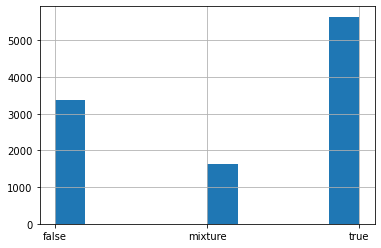

In [10]:
result["label"].hist()

All labels except false and true are dropped.

In [11]:
result.shape

(10654, 10)

In [12]:
dframe = result[["claim_id","claim","main_text","label"]].copy()

In [13]:
dframe.isna().sum()

claim_id      0
claim         8
main_text    26
label        29
dtype: int64

In [14]:
dframe = dframe.dropna()

In [15]:
dframe['label'].replace(to_replace=['false','true'], value=[0, 1], inplace=True)

In [16]:
dframe.tail()

,claim_id,claim,main_text,label
1230,3295,Christmas miracle for Florida dog whose heart ...,The heart of Gerald Ford’s 1-year-old French b...,1
1231,6904,Another dolphin dies at Arizona aquatic facility.,A statement from Dolphinaris Arizona in Scotts...,1
1232,13874,"What the facts say"" is ... ""the best scenario ...",Republican National Committee chairman Reince ...,0
1233,2847,FDA advisory panel rejects J&J drug for acute ...,"The panel voted 10 to 0, with one abstention, ...",1
1234,7394,Gene-editing Chinese scientist kept much of hi...,He Jiankui’s outsized aspirations began to tak...,1


In [17]:
dframe = dframe.reset_index(drop=True)

In [18]:
dframe.iloc[15,-2]

'Extinction Rebellion, which uses civil disobedience to highlight the risks posed by climate change and the accelerating loss of plant and animal species, is midway through a new two-week wave of actions in cities around the world. Activists thronged the financial heart of London on Monday, unfurling banners, addressing passersby by megaphone or blocking streets around locations including BlackRock, the Bank of England, Bank of China and Barclays. At BlackRock, volunteers glued themselves to the doors while others staged a mock dinner party with rolled-up banknotes on their plates. Police said they arrested more than 90 people. The arrestees included Rabbi Jeffrey Newman of the Finchley Reform Synagogue, who was arrested near the Bank of England praying, singing and wearing a prayer shawl for the first day of the Jewish festival Sukkot, Extinction Rebellion said. “The City of London is a preeminent nexus of power in the global system that is killing our world,” said Carolina Rosa, spok

This is an example main text.

In [19]:
dframe.to_csv("initial_file.csv")

I keep claim_id, claim, main_text and label columns for my models. I removed missing instances, and transform labels to 0 and 1, to change the problem as binary classification. There are numerous different approaches, however, I prefer binary classification since it gave better results for my models.

### Basic Data Cleaning 

For the basic data cleaning step, I removed claims from different languages, lower all letters in sentences, and join unescape characters.

In [20]:
df = pd.read_csv("initial_file.csv")

In [21]:
df.isna().sum()

Unnamed: 0    0
claim_id      0
claim         0
main_text     0
label         0
dtype: int64

In [22]:
import html
def simplify_text(text):
    return html.unescape(" ".join(text.split()))

def lower_sentences(text):
    return text.lower()

In [23]:
df["claim-p"] = df["claim"].map(lower_sentences)
df["claim-p"] = df["claim-p"].map(simplify_text)

In [24]:
!pip install langdetect
import langdetect
from langdetect import detect
import re

def detect_comment_lang(comment):
    
    comment = ' '.join(re.sub("(@[A-Za-z0-9_\-]+ )|(https?:\/\/.* )|(www\..* )"," ",comment).split())
    try:
        lang = detect(comment)
    except:
        lang = ""
        
    return lang

df["lang"] = df["claim-p"].map(detect_comment_lang)

# Summarizes detected language counts:
df["lang"].value_counts()

     |████████████████████████████████| 981 kB 1.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993190 sha256=a724149e4138be7f55c702f2b6b1971cf0c8d83c00376c575ad1571d660aaa6c
  Stored in directory: /root/.cache/pip/wheels/59/f6/9d/85068904dba861c0b9af74e286265a08da438748ee5ae56067
Successfully built langdetect


en    10367
fr       60
ca       48
it       27
af       26
da       21
nl       16
ro       15
sv       10
es        8
no        4
fi        4
et        3
tl        3
cy        2
sl        2
sq        2
id        2
hr        2
pt        1
lt        1
lv        1
Name: lang, dtype: int64

In [25]:
df = df[df["lang"] == "en"]

In [26]:
df.index = pd.RangeIndex(0,len(df.index))

In [27]:
df = df.drop(["lang"],axis = 1)

In [28]:
df = df.drop(["Unnamed: 0"],axis = 1)

In [29]:
df.shape

(10367, 5)

In [30]:
df.tail()

,claim_id,claim,main_text,label,claim-p
10362,3295,Christmas miracle for Florida dog whose heart ...,The heart of Gerald Ford’s 1-year-old French b...,1,christmas miracle for florida dog whose heart ...
10363,6904,Another dolphin dies at Arizona aquatic facility.,A statement from Dolphinaris Arizona in Scotts...,1,another dolphin dies at arizona aquatic facility.
10364,13874,"What the facts say"" is ... ""the best scenario ...",Republican National Committee chairman Reince ...,0,"what the facts say"" is ... ""the best scenario ..."
10365,2847,FDA advisory panel rejects J&J drug for acute ...,"The panel voted 10 to 0, with one abstention, ...",1,fda advisory panel rejects j&j drug for acute ...
10366,7394,Gene-editing Chinese scientist kept much of hi...,He Jiankui’s outsized aspirations began to tak...,1,gene-editing chinese scientist kept much of hi...


In [31]:
df.to_csv("cleaned_file.csv")

### Text Preprocessing (claims)

To be able to extract features from claims, I applied several text preprocessing operations to claims. These steps include tokenizing, pos tagging, lemmatization and removal of stop words.

In [32]:
df = pd.read_csv("cleaned_file.csv")

In [33]:
from nltk.corpus import stopwords
import sys
import re
import nltk.data
from nltk import pos_tag_sents
from nltk.sentiment.util import mark_negation
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.tokenize import word_tokenize

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [34]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [35]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
def tokenize_postag(text):
    tokenized = tokenizer.tokenize(text)
    postagged = nltk.pos_tag(tokenized)
    return postagged

In [37]:
df["postagged"]= df["claim-p"].apply(tokenize_postag)

In [38]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN 
    
    
def lemmatize_text(text):

        return [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in text]

In [39]:
df['lemmatized'] = df["postagged"].apply(lemmatize_text)

In [40]:
stop_words = stopwords.words('english')
sw_list = ["the", '...' , '--' , "''" , '``' , "'s", "a", "of","get", "<lb>", "i", "ve", "t", "s","m","http","com","lb"]
stop_words.extend(sw_list)
len(stop_words)

197

In [41]:
df['lemmatized'] = df['lemmatized'].apply(lambda x: [item for item in x if item not in stop_words])

In [42]:
def listToString(list):
    str1 = " "
    return (str1.join(list))

In [43]:
df['lemmatized_str'] = df["lemmatized"].apply(listToString)

In [44]:
df.head()

,Unnamed: 0,claim_id,claim,main_text,label,claim-p,postagged,lemmatized,lemmatized_str
0,0,15661,"""The money the Clinton Foundation took from fr...","""Hillary Clinton is in the political crosshair...",0,"""the money the clinton foundation took from fr...","[(the, DT), (money, NN), (the, DT), (clinton, ...","[money, clinton, foundation, take, foreign, go...",money clinton foundation take foreign governme...
1,1,9893,Annual Mammograms May Have More False-Positives,While the financial costs of screening mammogr...,mixture,annual mammograms may have more false-positives,"[(annual, JJ), (mammograms, NNS), (may, MD), (...","[annual, mammogram, may, false, positive]",annual mammogram may false positive
2,2,11358,SBRT Offers Prostate Cancer Patients High Canc...,The news release quotes lead researcher Robert...,mixture,sbrt offers prostate cancer patients high canc...,"[(sbrt, NN), (offers, NNS), (prostate, VBP), (...","[sbrt, offer, prostate, cancer, patient, high,...",sbrt offer prostate cancer patient high cancer...
3,3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","The story does discuss costs, but the framing ...",1,"study: vaccine for breast, ovarian cancer has ...","[(study, NN), (vaccine, NN), (for, IN), (breas...","[study, vaccine, breast, ovarian, cancer, pote...",study vaccine breast ovarian cancer potential
4,4,9851,Angioplasty through the wrist backed by new study,The story did not provide cost estimates for e...,1,angioplasty through the wrist backed by new study,"[(angioplasty, NN), (through, IN), (the, DT), ...","[angioplasty, wrist, back, new, study]",angioplasty wrist back new study


In [45]:
df[["claim_id","main_text","label"]].to_csv("main_texts.csv")

In [46]:
claim_df = df[["claim_id","claim","lemmatized_str","label"]]

In [47]:
claim_df.head(5)

,claim_id,claim,lemmatized_str,label
0,15661,"""The money the Clinton Foundation took from fr...",money clinton foundation take foreign governme...,0
1,9893,Annual Mammograms May Have More False-Positives,annual mammogram may false positive,mixture
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,sbrt offer prostate cancer patient high cancer...,mixture
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...",study vaccine breast ovarian cancer potential,1
4,9851,Angioplasty through the wrist backed by new study,angioplasty wrist back new study,1


This is the final processed file, ready for feature extraction and classification steps. I split this preprocessed dataset into train and test files.

In [48]:
import numpy as np

claim_df['split'] = np.random.randn(claim_df.shape[0], 1)

msk = np.random.rand(len(claim_df)) <= 0.7

train = claim_df[msk]
test = claim_df[~msk]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
(train.shape,test.shape)

((7270, 5), (3097, 5))

In [50]:
train.to_csv("preprocessed_train.csv")
test.to_csv("preprocessed_test.csv")

### Feature Extraction with TF-IDF

To extract required predictors for models, I applied TF-IDF vectorizer to preprocessed claims. After several experiments, I set ngram range as (1,2), and set maximum number of features to 60.000 since these parameters gave the best result. I seperately apply TFIDF to train and test data to prevent data leakage problem.

In [51]:
dftrain = pd.read_csv("preprocessed_train.csv")
dftest = pd.read_csv("preprocessed_test.csv")

In [52]:
Xtrain = dftrain.iloc[:,-3]
ytrain = dftrain.iloc[:,-2]

Xtest = dftest.iloc[:,-3]
ytest = dftest.iloc[:,-2]

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 60000 , lowercase=False , ngram_range=(1,2))

In [54]:
vec_train_data = vectorizer.fit_transform(Xtrain)
vec_train_data = vec_train_data.toarray()

In [55]:
vec_test_data = vectorizer.transform(Xtest).toarray()

In [56]:
vec_train_data.shape , vec_test_data.shape

((7270, 59984), (3097, 59984))

In [57]:
ytrain.value_counts()

1          3798
0          2350
mixture    1122
Name: label, dtype: int64

In [58]:
ytest.value_counts()

1          1676
0           955
mixture     466
Name: label, dtype: int64

In [59]:
training_data = pd.DataFrame(vec_train_data , columns=vectorizer.get_feature_names())
testing_data = pd.DataFrame(vec_test_data , columns= vectorizer.get_feature_names())

### Multinomial Naive Bayes Model 

As a baseline, I built a multinomial naive bayes model. Evaluation metrics are also provided. The outcome of the model looks sufficient, however, I aim to improve it by applying different techniques.

False label's recall score is low, therefore, this model has low completeness for labelling false instances. This maybe due to unbalanced labels of instances since there are less false labels than true labels in the dataset.

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [61]:
clf = MultinomialNB()
clf.fit(vec_train_data, ytrain)
y_pred  = clf.predict(vec_test_data)
print(classification_report(ytest , y_pred))

              precision    recall  f1-score   support

           0       0.64      0.21      0.32       955
           1       0.58      0.96      0.73      1676
     mixture       0.00      0.00      0.00       466

    accuracy                           0.59      3097
   macro avg       0.41      0.39      0.35      3097
weighted avg       0.51      0.59      0.49      3097



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From these metrics, we can infer that model blindly label inputs as 1. This increases recall score of label 1, but it does not mean that model performs good.

### BERT Embeddings

In order to improve performance of the model, I decided to use pretrained BERT model for feature extraction process. Rather than building the whole architecture, I used SentenceTransformer library.

In [62]:
!pip install sentence_transformers

     |████████████████████████████████| 74 kB 775 kB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.3-py3-none-any.whl size=114276 sha256=75de5a5f722980eb6c5dfc635746cea5ea01a3cbdc3d0e7118743b0028ec6be0
  Stored in directory: /root/.cache/pip/wheels/1b/bf/4c/23bc3e6ee5cce3844a3a807d26c7943caafa756a44574d7aa1
Successfully built sentence-transformers


In [63]:
from sentence_transformers import SentenceTransformer

In [64]:
sentence_model = SentenceTransformer("stsb-distilbert-base")
train_embeddings = sentence_model.encode(Xtrain, show_progress_bar=False)
test_embeddings = sentence_model.encode(Xtest, show_progress_bar=False)

  0%|          | 0.00/245M [00:00<?, ?B/s]

In [65]:
train_embeddings.shape , test_embeddings.shape

((7270, 768), (3097, 768))

I use pretrained BERT models for feature extraction. At the end of this process, I get 768 dimensions of texts, ready to used for classification of claims whether they are true or false. 

In [66]:
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

SVM = svm.SVC(C=100, kernel='rbf', degree=8, gamma="auto")
SVM.fit(train_embeddings, ytrain)# predict the labels on validation dataset



SVC(C=100, degree=8, gamma='auto')

In [67]:
cvscore = cross_val_score(SVM , train_embeddings,ytrain, cv=10)
print(cvscore.mean())

0.5727647867950483


I applied 10-fold cross validation for my SVM model, result looks promising if you consider that I only used claim texts for feature extraction.

In [68]:
predictions_SVM = SVM.predict(test_embeddings)# Use accuracy_score function to get the accuracy


print(classification_report(ytest , predictions_SVM))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       955
           1       0.71      0.73      0.72      1676
     mixture       0.25      0.18      0.21       466

    accuracy                           0.58      3097
   macro avg       0.48      0.48      0.48      3097
weighted avg       0.57      0.58      0.58      3097



After using BERT embeddings, rather than TFIDF vectors, accuracy is considerably increased. Aim of this project was to test, if health related fact checking is possible solely using textual claims data. Using whole main text of health related news would provide better results. Additionally, model performance can be increased with using additional features. 